# Application of Machine learning on RNA-Protein interaction

## Process the files

In [1]:
import numpy as np
import pandas as pd
import re
import seaborn as sns

def read_structure(file_name):
    fo = open(file_name,"r+")
    MFE = []
    structure = []
    
    while(True):
        #create the sequence for folding
        seqRead = fo.readline()
        if len(seqRead) == 0:
            break
        seqChop = seqRead.strip()
        if seqChop[0:3] != "GCA":
            try:
                result = re.search('-\d{0,2}\.\d{0,2}',seqChop)   
                MFE.append(result.group(0))
                new_seq = seqChop.split(' ')
                structure.append(new_seq[0])
            except:
                pass
    fo.close()
    return pd.DataFrame({"MFE": MFE, 'structure' : structure})

file_01 = read_structure('MFE-B-1-6.txt')
file_01.head()

,MFE,structure
0,-0.50,......(((.....)))...............
1,-0.50,......(((.....)))...............
2,-0.50,......(((.....)))...............
3,-0.50,......(((.....)))...............
4,-0.50,......(((.....)))...............


In [2]:
TW_A_dataset = pd.read_csv('21ABC rk ave summary-U.csv') 
TW_A_dataset.head()

,Sequence,21A-1-6,21B-1-6,21C -1-6,MFEA,MFEB,MFEC
0,AAAAAA,1.657296,0.983233,1.307640,-3.4,-0.5,-8.6
1,AAAAAC,1.599794,1.014041,1.560623,-3.4,-0.5,-8.6
2,AAAAAG,1.335313,0.817613,0.355829,-3.4,-0.5,-8.6
3,AAAAAU,1.757485,1.396370,1.560339,-3.4,-0.5,-8.6
4,AAAACA,1.405845,1.326292,0.968145,-3.4,-0.5,-8.6


## Convert structure data into table for Label Encoder

In [4]:
def conv_seq(target_string):
    list_pd = []
    for i in target_string:
        list_pd.append(i)
    result = pd.Series(list_pd)
    return result

def combind_to_DF(string_list):
    comb = []
    for seq in string_list:
        comb.append(conv_seq(seq))
    final = pd.concat(comb, axis = 1).T
    return final

#=============================================
structure_table = combind_to_DF(file_01.structure)
print('Symbols:', structure_table.loc[:,22].unique())
structure_table.head()

sequence_table = combind_to_DF(TW_A_dataset.Sequence)
sequence_table.head()

Symbols: ['.' ')' '(']


,0,1,2,3,4,5
0,A,A,A,A,A,A
1,A,A,A,A,A,C
2,A,A,A,A,A,G
3,A,A,A,A,A,U
4,A,A,A,A,C,A


## Convert structure table to Label Encoder

In [5]:
from sklearn.preprocessing import LabelEncoder

column_names = structure_table.columns
new_structure_table = structure_table.copy()
my_label_encoder = LabelEncoder()

for col_name in column_names:
    new_structure_table[col_name] = my_label_encoder.fit_transform(structure_table[col_name])
new_structure_table.shape

(4096, 32)

## Convert Sequence to One-Hot Encoding

In [6]:
from sklearn.preprocessing import OneHotEncoder

# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(sequence_table))
OH_cols_train.columns = OH_encoder.get_feature_names()
OH_cols_train.head()

,x0_A,x0_C,x0_G,x0_U,x1_A,x1_C,x1_G,x1_U,x2_A,x2_C,...,x3_G,x3_U,x4_A,x4_C,x4_G,x4_U,x5_A,x5_C,x5_G,x5_U
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [7]:
#Combind frames
input_data = pd.concat([TW_A_dataset, new_structure_table, OH_cols_train],axis = 1)
input_data.head()

,Sequence,21A-1-6,21B-1-6,21C -1-6,MFEA,MFEB,MFEC,0,1,2,...,x3_G,x3_U,x4_A,x4_C,x4_G,x4_U,x5_A,x5_C,x5_G,x5_U
0,AAAAAA,1.657296,0.983233,1.307640,-3.4,-0.5,-8.6,1,1,1,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,AAAAAC,1.599794,1.014041,1.560623,-3.4,-0.5,-8.6,1,1,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,AAAAAG,1.335313,0.817613,0.355829,-3.4,-0.5,-8.6,1,1,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,AAAAAU,1.757485,1.396370,1.560339,-3.4,-0.5,-8.6,1,1,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,AAAACA,1.405845,1.326292,0.968145,-3.4,-0.5,-8.6,1,1,1,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


## Normalization

In [8]:
from sklearn.preprocessing import StandardScaler

# Separating out the features
temp_data = input_data.drop(['Sequence'], axis = 1).abs()
features = temp_data.columns
X = temp_data.values
# Separating out the target
#y = df.loc[:,['target']].values
# Standardizing the features
X = StandardScaler().fit_transform(X)

[0.15194828 0.07629667 0.07357837 0.05489822 0.0494983  0.03957859
 0.03709136 0.03309208 0.02481189 0.02395294]
[9.42309395 4.73154885 4.56297273 3.40452088 3.06964376 2.4544718
 2.30022581 2.05221019 1.53871285 1.48544489]
[0.15194828 0.22824495 0.30182332 0.35672154 0.40621984 0.44579843
 0.48288978 0.51598187 0.54079376 0.5647467 ]


Text(0, 0.5, 'Cumulative Explained Variance')

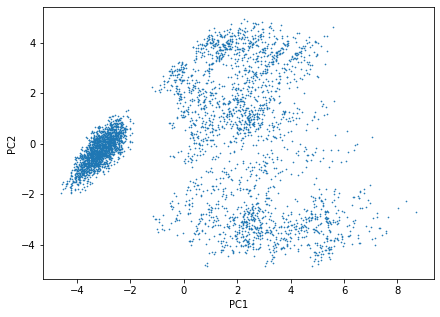

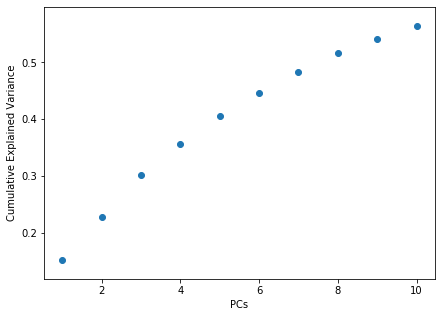

In [9]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
#Setting parameters
components = 10
#generate PC Labels
pc_features = []
for i in np.arange(0,components):
    pc_features.append('PC'+str(i))
pca = PCA(n_components=components)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = pc_features)

#principalDf = pd.DataFrame(data = principalComponents
#             , columns = ['principal component 1', 'principal component 2'])



#PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
#    svd_solver='auto', tol=0.0, whiten=False)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_)
print(pca.explained_variance_ratio_.cumsum())
#print(pca.singular_values_)

#finalDf = pd.concat([principalDf, df[['target']]], axis = 1)
finalDf = principalDf.copy()
#Visualze the data
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111)
pc1 = finalDf.iloc[:,0]
pc2 = finalDf.iloc[:,1]
ax.scatter(pc1,pc2,s = 0.4)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
#ax.legend(df_mod.columns)

#select the range of value
#finalDf[(finalDf.iloc[:,0] < -1) & (finalDf.iloc[:,1] < 0)]
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111)
x_ = np.arange(1,components+1)
y_ = pca.explained_variance_ratio_.cumsum()
ax.scatter(x_,y_)
ax.set_xlabel("PCs")
ax.set_ylabel("Cumulative Explained Variance")

In this analysis, we can plot PC1, PC2 and obviously there are three groups can be seen in this plot. Let's parse those three groups. The first one is PC1 less than -2 and other two groups are PC1 > -2 with separation by PC2 = -1.

In [10]:
DataTable = pd.concat([input_data, finalDf, file_01.structure], axis = 1)
DataTable.set_index("Sequence")
DataTable.head()

,Sequence,21A-1-6,21B-1-6,21C -1-6,MFEA,MFEB,MFEC,0,1,2,...,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,structure
0,AAAAAA,1.657296,0.983233,1.307640,-3.4,-0.5,-8.6,1,1,1,...,-0.655648,1.079942,0.788207,0.128236,-0.555409,-2.664125,-1.778964,0.277813,-1.371934,......(((.....)))...............
1,AAAAAC,1.599794,1.014041,1.560623,-3.4,-0.5,-8.6,1,1,1,...,-0.552136,1.018002,0.733406,0.129808,-0.505626,-2.311494,-1.858877,0.198208,-1.534607,......(((.....)))...............
2,AAAAAG,1.335313,0.817613,0.355829,-3.4,-0.5,-8.6,1,1,1,...,-0.214624,1.202876,0.325333,0.681192,-1.203844,-3.075774,-0.338785,-0.026523,-2.031292,......(((.....)))...............
3,AAAAAU,1.757485,1.396370,1.560339,-3.4,-0.5,-8.6,1,1,1,...,-0.681942,1.011909,0.825501,0.134878,-0.636099,-2.549490,-1.805239,0.403196,-1.325923,......(((.....)))...............
4,AAAACA,1.405845,1.326292,0.968145,-3.4,-0.5,-8.6,1,1,1,...,-0.186021,0.897634,0.352176,0.206942,-1.052754,-2.564005,-0.787494,0.508391,-0.540495,......(((.....)))...............


In [11]:
group1 = DataTable[DataTable.PC1 < -2] 
group1[['21A-1-6','21B-1-6','21C -1-6', 'MFEA','MFEB','MFEC']].describe()

,21A-1-6,21B-1-6,21C -1-6,MFEA,MFEB,MFEC
count,750.000000,750.000000,750.000000,750.0000,750.000000,750.000000
mean,0.754336,0.956218,1.905032,-4.7992,-2.354667,-8.605733
std,0.581464,0.782880,1.558204,1.6209,1.591507,0.068019
min,-0.713815,-1.806376,-1.085069,-12.0000,-9.100000,-9.600000
25%,0.371695,0.473117,0.836109,-5.5000,-3.100000,-8.600000
50%,0.585324,0.918555,1.437907,-4.6000,-1.700000,-8.600000
75%,1.053373,1.408124,2.694126,-3.4000,-1.200000,-8.600000
max,3.335875,3.274009,7.704213,-3.2000,-0.600000,-8.600000


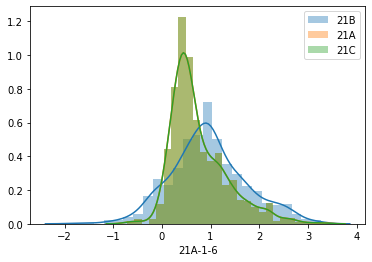

In [12]:
sns.distplot(group1.loc[:,"21B-1-6"],label="21B")
sns.distplot(group1.loc[:,"21A-1-6"], label="21A")
sns.distplot(group1.loc[:,"21A-1-6"], label="21C")
plt.legend()

In [14]:
group2 = DataTable[( (DataTable.PC1 > -1) & (DataTable.PC2 < -1))]
group2[['21A-1-6','21B-1-6','21C -1-6', 'MFEA','MFEB','MFEC']].describe()

,21A-1-6,21B-1-6,21C -1-6,MFEA,MFEB,MFEC
count,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000
mean,0.471098,0.914383,1.538774,-5.853623,-2.658551,-8.617391
std,0.427163,0.779887,1.456835,1.956636,1.575150,0.120749
min,-0.881426,-1.119088,-1.755632,-12.900000,-6.500000,-9.600000
25%,0.212996,0.419152,0.557010,-7.000000,-3.800000,-8.600000
50%,0.372313,0.847676,1.192734,-5.700000,-2.400000,-8.600000
75%,0.642454,1.325496,2.262902,-4.400000,-1.200000,-8.600000
max,2.354834,3.972782,7.477368,-3.200000,-0.500000,-8.600000


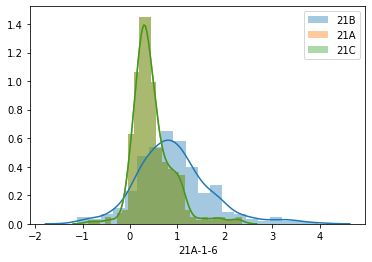

In [15]:
sns.distplot(group2.loc[:,"21B-1-6"],label="21B")
sns.distplot(group2.loc[:,"21A-1-6"], label="21A")
sns.distplot(group2.loc[:,"21A-1-6"], label="21C")
plt.legend()

In [16]:
group3 = DataTable[( (DataTable.PC1 > -1) & (DataTable.PC2 > -1))] 
group3[['21A-1-6','21B-1-6','21C -1-6', 'MFEA','MFEB','MFEC']].describe()

,21A-1-6,21B-1-6,21C -1-6,MFEA,MFEB,MFEC
count,2684.000000,2684.000000,2684.000000,2684.000000,2684.000000,2684.000000
mean,0.708445,1.070957,1.901853,-4.907228,-1.542846,-8.620119
std,0.560298,0.832581,1.397407,1.640659,1.758402,0.123427
min,-1.164661,-2.219749,-8.464344,-15.100000,-11.100000,-9.600000
25%,0.325142,0.545189,0.882057,-5.700000,-2.200000,-8.600000
50%,0.536468,1.030442,1.657080,-4.600000,-0.500000,-8.600000
75%,0.953815,1.586748,2.723028,-3.400000,-0.500000,-8.600000
max,3.252537,3.894389,7.652550,-3.200000,-0.500000,-8.600000


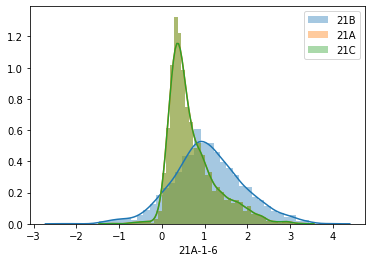

In [17]:
sns.distplot(group3.loc[:,"21B-1-6"],label="21B")
sns.distplot(group3.loc[:,"21A-1-6"], label="21A")
sns.distplot(group3.loc[:,"21A-1-6"], label="21C")
plt.legend()

## Feature Selection

[0.03642172 0.00480574 0.00067729 0.00095973 0.00103405 0.00249387
 0.00220889 0.00442508 0.00984282 0.0050766  0.00618679 0.00788292
 0.00388204 0.00109038 0.00257942 0.00185884 0.00329052 0.00504507
 0.00336882 0.00180241 0.00151698 0.00321846 0.00406566 0.00122257
 0.00221366 0.00235188 0.00734122 0.00224916 0.01022055 0.0069315
 0.01675629 0.01217145 0.01074427 0.00814368 0.0265102  0.03577503
 0.01605055 0.03686825 0.02287934 0.03063857 0.03202201 0.02822152
 0.02160751 0.05214972 0.02137673 0.02543302 0.02712767 0.02531277
 0.0258788  0.03679168 0.05608425 0.03214723 0.02996045 0.0395349
 0.03017884 0.03186216 0.08706429 0.03444416]


/Users/fatmimi/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


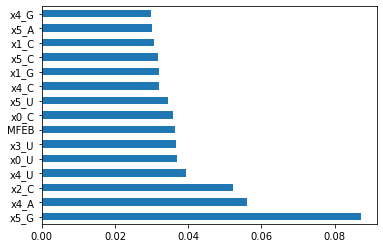

In [25]:
from sklearn.ensemble import ExtraTreesClassifier
number_labels = 3
y = pd.cut(input_data.loc[:,'21B-1-6'], bins=number_labels, labels=np.arange(number_labels), right=False)  #target column i.e price range
X = input_data.drop(['Sequence','21C -1-6', '21A-1-6', '21B-1-6', 'MFEA'],axis = 1).abs()
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

In [26]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

number_labels = 3
y = pd.cut(input_data.loc[:,'21B-1-6'], bins=number_labels, labels=np.arange(number_labels), right=False)
X = input_data.drop(['Sequence','21B-1-6', '21A-1-6', '21C -1-6', 'MFEA'],axis = 1).abs()
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(15,'Score'))  #print 10 best features

   Specs       Score
56  x5_G  635.503507
0   MFEB  568.113752
43  x2_C  186.875191
50  x4_A  170.200052
8      6  159.580288
30    28  146.040386
31    29  123.569746
9      7  111.747930
36  x0_G  106.632271
53  x4_U  103.478463
44  x2_G  101.831995
37  x0_U   98.480882
29    27   97.600529
49  x3_U   90.408900
55  x5_C   89.275395


## Group our data by k-mean classifier

/Users/fatmimi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


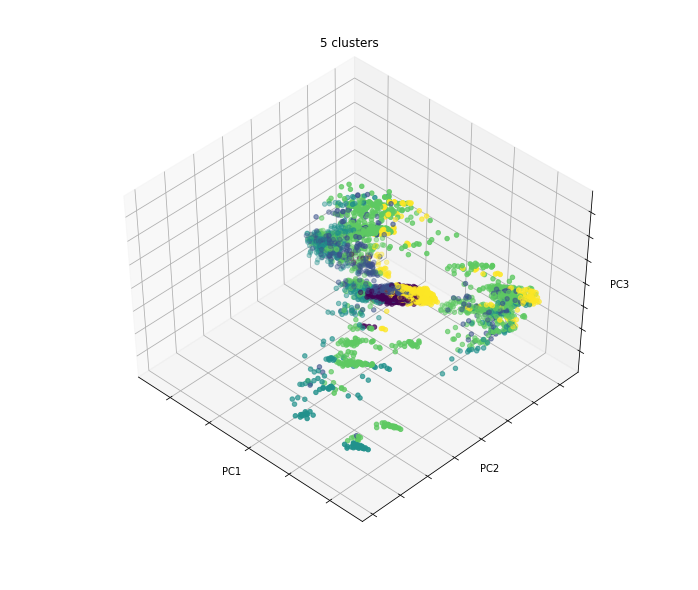

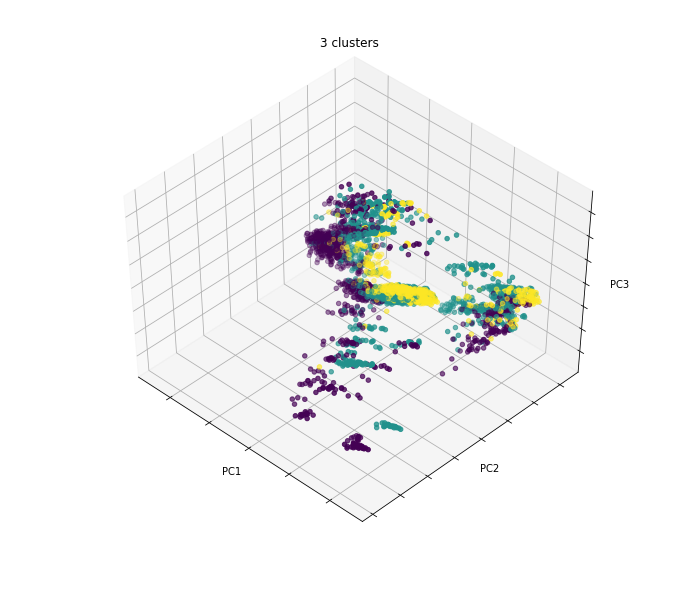

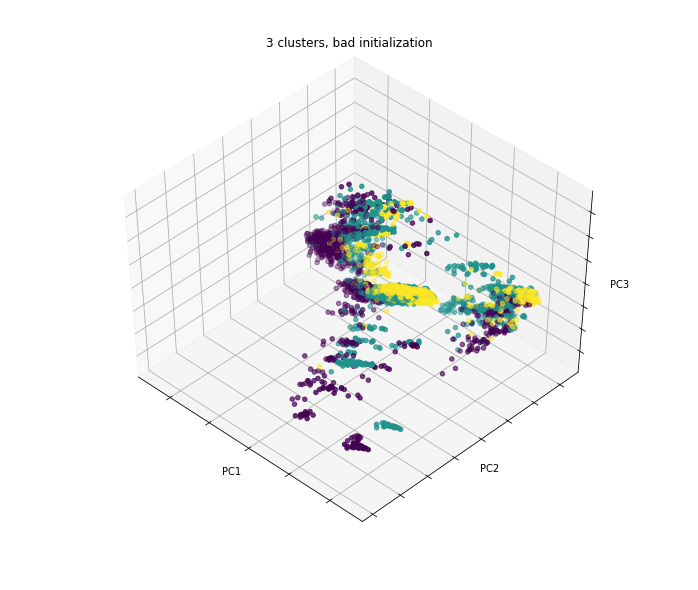

In [34]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

#Model preparation
estimators = [('k_means_5', KMeans(n_clusters=5)),
              ('k_means_3', KMeans(n_clusters=3)),
              ('k_means_bad_init', KMeans(n_clusters=3, n_init=1,
                                               init='random'))]
#Data preparation
y = pd.cut(input_data.loc[:,'21B-1-6'], bins=number_labels, labels=np.arange(number_labels), right=False)  #target column i.e price range
X = input_data.drop(['Sequence'],axis = 1).abs()

fignum = 1
titles = ['5 clusters', '3 clusters', '3 clusters, bad initialization']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(10, 8))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    ax.scatter(DataTable.PC1, DataTable.PC2, DataTable.PC3,
               c=labels.astype(np.float), edgecolor=None)

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1
fig.show()

## Add labels to DataFrame

In [36]:
# Here we use 5 class first
estimator = KMeans(n_clusters=5)
estimator.fit(X)
result = DataTable.copy()
result['classes'] = estimator.labels_


/Users/fatmimi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


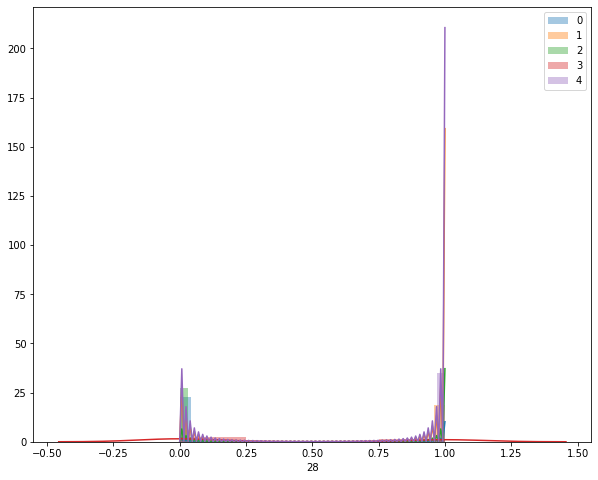

In [46]:
plot_column = 28
for groups in np.arange(0,5):
    fig = plt.figure(fignum, figsize=(10, 8))
    label_table = result[(result.classes == groups)] 
    sns.distplot(label_table.loc[:,plot_column], label = groups)
plt.legend()
fig.show()

,21A-1-6,21B-1-6,21C -1-6,MFEA,MFEB,MFEC,0,1,2,3,...,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,classes
count,1251.000000,1251.000000,1251.000000,1251.000000,1251.000000,1251.000000,1251.0,1251.0,1251.0,1251.0,...,1251.000000,1251.000000,1251.000000,1251.000000,1251.000000,1251.000000,1251.000000,1251.000000,1251.000000,1251.0
mean,0.976897,1.149715,1.863349,-4.170983,-0.504077,-8.627578,1.0,1.0,1.0,1.0,...,-0.129531,0.427768,-0.297483,0.095346,-0.528371,-0.815152,0.122615,0.096116,0.006720,4.0
std,0.670196,0.729453,0.968788,0.916810,0.029247,0.148266,0.0,0.0,0.0,0.0,...,0.616571,0.449243,0.657540,0.573003,0.779662,0.964988,1.301508,1.091657,1.077220,0.0
min,-1.164661,-1.402138,-2.983365,-6.600000,-0.800000,-9.600000,1.0,1.0,1.0,1.0,...,-3.094562,-1.740847,-2.176493,-1.445142,-2.594329,-3.405153,-3.659975,-3.249403,-2.877471,4.0
25%,0.478225,0.718040,1.166881,-4.800000,-0.500000,-8.600000,1.0,1.0,1.0,1.0,...,-0.515793,0.183010,-0.765223,-0.264980,-1.073396,-1.481316,-0.767956,-0.658706,-0.763090,4.0
50%,0.809034,1.206958,1.836725,-3.900000,-0.500000,-8.600000,1.0,1.0,1.0,1.0,...,-0.127766,0.445764,-0.355154,0.055907,-0.538202,-0.846807,0.106951,0.039584,-0.022110,4.0
75%,1.356805,1.647106,2.529078,-3.400000,-0.500000,-8.600000,1.0,1.0,1.0,1.0,...,0.191591,0.723395,0.145048,0.424141,0.051200,-0.141846,1.049773,0.740362,0.752124,4.0
max,3.563087,3.140085,4.162238,-3.200000,-0.500000,-8.600000,1.0,1.0,1.0,1.0,...,3.229549,3.581063,1.614407,4.945378,2.374867,2.015228,3.489488,3.749150,3.306121,4.0


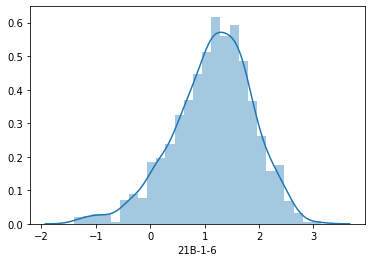

In [52]:
label_table = result[(result.classes == 4)] 
sns.distplot(label_table.loc[:,'21B-1-6'], label = 4)
label_table.describe()

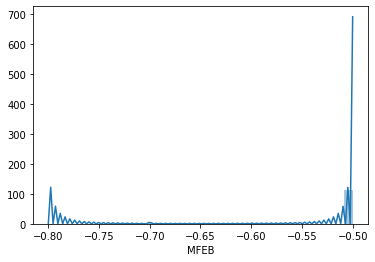

In [51]:
sns.distplot(label_table.loc[:,'MFEB'], label = 4)

,21A-1-6,21B-1-6,21C -1-6,MFEA,MFEB,MFEC,0,1,2,3,...,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,classes
count,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,...,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.0
mean,0.278911,0.759735,1.380971,-7.705485,-1.837553,-8.618143,0.995781,0.985232,0.983122,0.968354,...,1.377147,-0.869930,-0.837873,0.098368,0.975196,0.792571,1.328693,-0.020991,-0.248738,3.0
std,0.220312,0.722939,1.124941,1.424822,1.169459,0.116539,0.064888,0.120750,0.128949,0.175240,...,2.225096,1.385311,1.728525,1.409174,1.366226,1.108837,1.486057,1.145618,1.436960,0.0
min,-0.881426,-1.806376,-2.398979,-15.100000,-4.800000,-9.600000,0.000000,0.000000,0.000000,0.000000,...,-3.789883,-4.224692,-4.918729,-3.573717,-3.042650,-1.956076,-2.271416,-3.496954,-3.572035,3.0
25%,0.159483,0.302496,0.541452,-8.400000,-2.675000,-8.600000,1.000000,1.000000,1.000000,1.000000,...,0.290670,-1.298088,-1.723800,-0.739631,0.060297,-0.021277,0.209019,-0.796633,-1.233716,3.0
50%,0.269414,0.826023,1.180164,-7.450000,-1.800000,-8.600000,1.000000,1.000000,1.000000,1.000000,...,1.609031,-0.726840,-1.272008,0.075062,0.909719,0.791921,1.440101,0.015141,-0.340332,3.0
75%,0.397987,1.249938,2.194350,-6.700000,-0.600000,-8.600000,1.000000,1.000000,1.000000,1.000000,...,3.266065,-0.193985,-0.715607,1.033552,1.848048,1.572241,2.417745,0.741183,0.729931,3.0
max,1.075495,2.899811,4.592373,-5.400000,-0.500000,-8.600000,1.000000,1.000000,1.000000,1.000000,...,4.928316,6.843726,6.787236,6.605157,5.319768,4.111022,5.130370,3.052684,3.703452,3.0


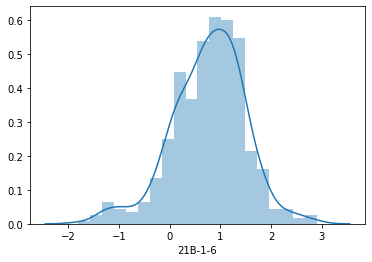

In [53]:
label_table = result[(result.classes == 3)] 
sns.distplot(label_table.loc[:,'21B-1-6'], label = 4)
label_table.describe()

,21A-1-6,21B-1-6,21C -1-6,MFEA,MFEB,MFEC,0,1,2,3,...,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,classes
count,1144.000000,1144.000000,1144.000000,1144.000000,1144.000000,1144.000000,1144.000000,1144.000000,1144.000000,1144.000000,...,1144.000000,1144.000000,1144.000000,1144.000000,1144.000000,1144.000000,1144.000000,1144.000000,1144.000000,1144.0
mean,0.823675,0.756065,1.485864,-4.017395,-1.853409,-8.617483,0.964161,0.958042,0.903846,0.829545,...,-0.522170,-0.150900,1.029897,0.737932,-0.217572,-0.310135,-0.121940,-0.004200,0.115451,2.0
std,0.582475,0.620613,1.020094,0.766503,0.846963,0.114978,0.185970,0.200581,0.294931,0.376196,...,2.593041,2.730229,2.550120,2.443731,1.686188,1.682948,1.352527,1.509474,1.318288,0.0
min,-0.749223,-1.482756,-1.755632,-6.200000,-4.400000,-9.600000,0.000000,0.000000,0.000000,0.000000,...,-4.864542,-3.930155,-4.739153,-3.827285,-5.271519,-4.691748,-3.699654,-4.304056,-3.610831,2.0
25%,0.418810,0.377774,0.780300,-4.700000,-2.500000,-8.600000,1.000000,1.000000,1.000000,1.000000,...,-3.033711,-2.148741,-0.778812,-1.002740,-1.413691,-1.568756,-1.071223,-0.996183,-0.807840,2.0
50%,0.643075,0.799931,1.326899,-3.700000,-1.700000,-8.600000,1.000000,1.000000,1.000000,1.000000,...,-0.610924,-0.644992,0.135331,0.070894,-0.009057,-0.560898,-0.216732,-0.042050,0.120062,2.0
75%,1.139521,1.147815,2.122715,-3.400000,-1.100000,-8.600000,1.000000,1.000000,1.000000,1.000000,...,1.762464,0.880419,2.449972,1.687195,0.951587,0.817273,0.801859,0.937930,1.040730,2.0
max,3.335875,2.730421,4.751751,-3.200000,-0.600000,-8.600000,1.000000,1.000000,1.000000,1.000000,...,4.567699,8.139181,8.464300,8.242450,4.389204,6.020380,4.150673,4.654561,4.599721,2.0


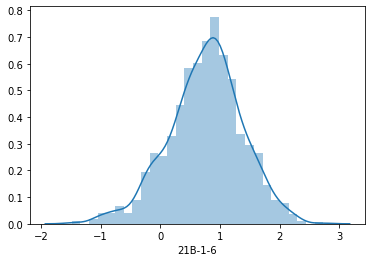

In [54]:
label_table = result[(result.classes == 2)] 
sns.distplot(label_table.loc[:,'21B-1-6'], label = 2)
label_table.describe()

,Sequence,21A-1-6,21B-1-6,21C -1-6,MFEA,MFEB,MFEC,0,1,2,...,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,structure,classes
2416,GCCUAA,1.184054,0.621215,4.457641,-5.9,-4.1,-8.6,1,1,1,...,-3.862784,0.232729,-2.682734,-0.502839,0.536743,-0.795872,-0.600582,0.282084,......(((.(((.((...)).))).)))...,1
2429,GCCUUC,1.157972,0.933219,4.277604,-5.9,-4.1,-8.6,1,1,1,...,-4.071916,-0.046199,-2.370334,-1.135871,0.938706,-0.251474,-0.170813,1.066823,......(((.(((.((...)).))).)))...,1
2420,GCCUCA,1.004984,0.927322,4.577063,-5.9,-4.1,-8.6,1,1,1,...,-4.059945,-0.142925,-2.651284,-0.928436,0.674688,0.103817,-0.393597,1.099600,......(((.(((.((...)).))).)))...,1
2419,GCCUAU,0.950377,1.183063,4.300941,-5.9,-4.1,-8.6,1,1,1,...,-3.934456,0.134128,-2.660534,-0.611207,0.717001,-0.633943,-0.419066,0.383377,......(((.(((.((...)).))).)))...,1
2417,GCCUAC,1.123020,0.865379,4.755283,-5.9,-4.1,-8.6,1,1,1,...,-3.940306,0.195734,-2.728228,-0.376298,0.947821,-0.950328,-0.668592,0.130729,......(((.(((.((...)).))).)))...,1
2149,GACGCC,0.710380,1.505356,4.849215,-4.6,-3.9,-8.6,1,1,1,...,-0.346487,3.198647,-0.457901,-0.053416,2.732299,0.365878,-1.907120,-1.671831,......(((.....((((.......))))))),1
2163,GACUAU,1.119561,0.839919,6.294579,-4.6,-3.8,-8.6,1,1,1,...,0.979209,7.481838,-1.522501,1.061772,2.228731,0.771979,-1.901194,-0.097906,.............(((((.......)))))..,1
2161,GACUAC,1.299052,1.160220,6.191726,-4.6,-3.8,-8.6,1,1,1,...,0.957128,7.544210,-1.647071,1.400750,2.530449,0.321375,-2.097077,-0.315935,.............(((((.......)))))..,1
2160,GACUAA,1.088617,0.844066,6.002715,-4.6,-3.8,-8.6,1,1,1,...,1.024914,7.494222,-1.604745,1.269859,2.189968,0.629591,-2.008084,-0.131630,.............(((((.......)))))..,1
2385,GCCCAC,0.800361,1.828712,4.335896,-7.3,-3.7,-8.6,1,1,1,...,-4.090092,-0.250264,-3.440876,0.147063,1.377022,0.113317,-0.299201,-0.377826,......(((.(((.((...)).))).)))...,1


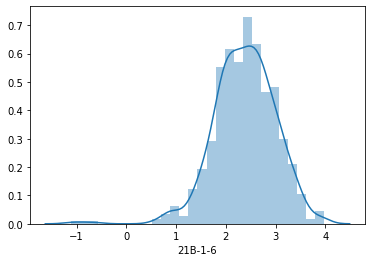

In [62]:
label_table = result[(result.classes == 1)] 
sns.distplot(label_table.loc[:,'21B-1-6'], label = 1)
label_table.sort_values('MFEB').head(15)

,21A-1-6,21B-1-6,21C -1-6,MFEA,MFEB,MFEC,0,1,2,3,...,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,classes
count,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,...,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.0
mean,0.367134,0.567519,0.993753,-5.118136,-5.145258,-8.600998,0.916805,0.860233,0.820300,0.798669,...,1.202106,0.679309,-0.981325,-0.711019,-0.680001,0.531915,-0.489749,-0.043123,0.012639,0.0
std,0.252267,0.521694,0.922251,1.377554,1.404403,0.020793,0.276406,0.347034,0.384258,0.401329,...,2.914538,3.364694,1.107563,1.832505,1.854096,1.515031,1.241725,1.208199,1.312532,0.0
min,-0.651804,-2.219749,-1.496238,-11.200000,-11.100000,-9.100000,0.000000,0.000000,0.000000,0.000000,...,-4.857073,-4.099724,-3.420207,-4.686018,-5.226038,-3.395291,-3.675584,-3.539293,-3.355484,0.0
25%,0.230015,0.261178,0.424663,-5.900000,-5.800000,-8.600000,1.000000,1.000000,1.000000,1.000000,...,-1.211006,-1.161298,-1.633331,-2.262784,-2.213073,-0.531624,-1.346800,-0.811881,-0.917912,0.0
50%,0.333160,0.635500,0.859952,-5.000000,-4.800000,-8.600000,1.000000,1.000000,1.000000,1.000000,...,1.593303,-0.303612,-1.088382,-0.323252,-0.330961,0.537441,-0.610280,-0.111064,0.012983,0.0
75%,0.452488,0.914022,1.309298,-4.000000,-4.100000,-8.600000,1.000000,1.000000,1.000000,1.000000,...,3.793732,0.956480,-0.552527,0.848001,0.628577,1.599771,0.324231,0.627187,0.946788,0.0
max,1.762189,2.631054,5.985530,-3.200000,-2.900000,-8.600000,1.000000,1.000000,1.000000,1.000000,...,4.835439,9.719764,6.921155,3.053608,4.856583,4.005375,3.533537,4.173556,3.391132,0.0


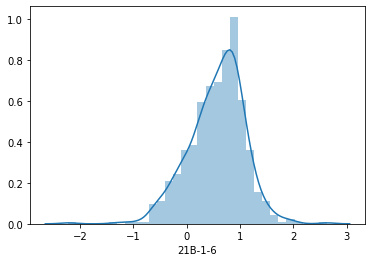

In [56]:
label_table = result[(result.classes == 0)] 
sns.distplot(label_table.loc[:,'21B-1-6'], label = 1)
label_table.describe()